In [4]:
%matplotlib inline

import numpy as np
from sklearn.linear_model import lasso_path
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from itertools import cycle
import matplotlib.pyplot as plt
from crossval import crossValLasso
import copy

In [5]:
## Read in the CSV data
data = np.loadtxt("diabetesX.csv",skiprows=1,delimiter=",")
response = np.loadtxt("diabetesY.csv")
(N,P) = np.shape(data)

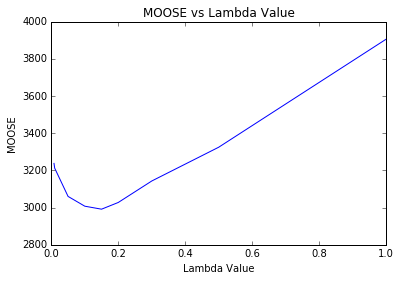

In [6]:
## Test Cross Validation

testLambdas = [8e-3, 1e-2, 5e-2, 0.1, 0.15, 0.2, 0.3, 0.5, 1]
testLambdas.reverse()
moose = [] # MOOOOOOOSE :D

for l in testLambdas:
    errs = crossValLasso(data, response, l)
    thismoose = sum(errs) / len(errs)
    moose.append(thismoose)
    
plt.plot(testLambdas, moose)
plt.xlabel("Lambda Value")
plt.ylabel("MOOSE")
plt.title("MOOSE vs Lambda Value")

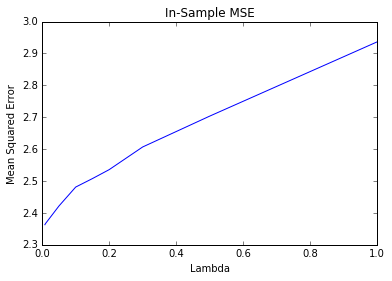

In [9]:
# Now we need to test Mallows Cp

# First, generate Lasso models and find in-sample MSE
# Code taken from LASSO notebook
mse = []

for a in testLambdas:
    thislasso = Lasso(alpha = a)
    thislasso.fit(data,response)
    predicted = thislasso.predict(data)
    diff = predicted - response
    thismse = norm(diff) / np.size(diff)
    mse.append(thismse)

plt.plot(testLambdas, mse)
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.title("In-Sample MSE")


In [10]:
# Generate actual betas with lasso_path for calculating betas
lassoPathLambdas, coeffs, _ = lasso_path(data,response, alphas = testLambdas)

betas = []

# Aggregate "coeffs" into individual vectors of betas
for j in range(len(coeffs[0])):
    betas.append(np.array([ x[j] for x in coeffs ]))

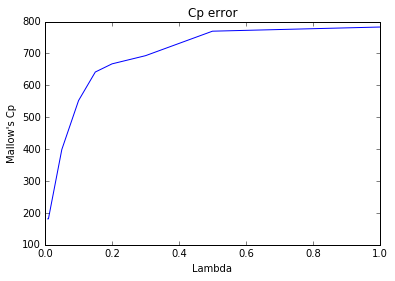

In [11]:
# Calculate variance
ols = LinearRegression()
ols.fit(data,response)
olspred = ols.predict(data)
sigmasquare = 1 / ( N - P ) * np.sum((response - olspred)**2)

Cp = copy.copy(mse)
# Modify in-sample MSE with Mallows terms
for j in range(len(Cp)):
    s = len(betas[j]) - np.count_nonzero(betas[j])
    Cp[j] += 2 * s / N * sigmasquare
    
plt.plot(testLambdas, Cp)
plt.xlabel("Lambda")
plt.ylabel("Mallow's Cp")
plt.title("Cp error")

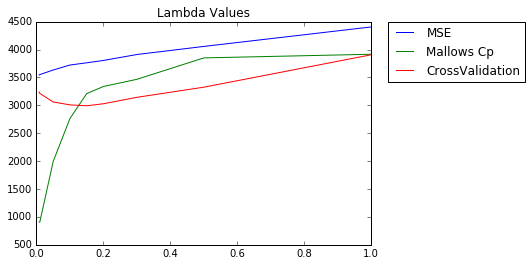

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(testLambdas,[ m * 1500 for m in mse],label="MSE")
ax1.plot(testLambdas,[ c * 5 for c in Cp],label="Mallows Cp")
ax1.plot(testLambdas, moose, label="CrossValidation")
ax1.set_title("Lambda Values")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
### NOT EVEN CLOSE